In [1]:
import matplotlib.pyplot as plt
import matplotlib as mtp
import math
import time
import numpy as np
from numpy import *
from collections import Counter
from scipy import interpolate
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
from matplotlib.backends.backend_pdf import PdfPages
import sys
import os
import pylab
from matplotlib import rc
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
#import illustris_python as il
import seaborn as sns
import pandas as pan
import astropy
from pyagn import sed
from astropy import units as u

In [2]:
L_box=50.
h=0.6774
cte_G=6.67408*10**-8 ## cm3 g-1 s-2                                                                                                                                               
cte_m_p=1.6726*10**-24 ## g                                                                                                                                                       
cte_eps_r=0.1
cte_sigma_t=6.6524*10**-25 ## cm2                                                                                                                                                 
cte_c=2.998*10**10 ## cm s-1 

In [3]:
def plot_total_flux(self, distance, color, ax = None):
        """                                                                                                                                                                              
        Plot total flux in energy units.                                                                                                                                                 
        yaxis: EL_E [ keV keV / s / keV]                                                                                                                                                 
        xaxis: E [keV]                                                                                                                                                                   
        """
        if(ax is None):
            print("creating figure.")
            fig, ax = plt.subplots()
        
        #flux = self.corona_flux(distance) + self.disk_flux(distance) + self.warm_flux(distance)
        flux = self.total_flux(distance)
        return ax,list(self.energy_range),list(flux)

creating figure.


c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pyagn\sed.py:230: RuntimeWarning: overflow encountered in exp
  planck_spectrum_exp = np.exp( energy / ( const.k_B *  temperature ))


[2.64009638e+37 4.67846346e+37 8.26217043e+37 1.45497504e+38
 2.55378561e+38 4.46522854e+38 7.77242095e+38 1.34585790e+39
 2.31630797e+39 3.95832649e+39 6.70877227e+39 1.12620529e+40
 1.86978021e+40 3.06515377e+40 4.95274199e+40 7.87413215e+40
 1.22971309e+41 1.88393561e+41 2.82915070e+41 4.16494952e+41
 6.01756703e+41 8.55156437e+41 1.19887190e+42 1.66330299e+42
 2.28978198e+42 3.13305280e+42 4.26334190e+42 5.76796522e+42
 7.75202354e+42 1.03369432e+43 1.36546858e+43 1.78349360e+43
 2.29826654e+43 2.91436176e+43 3.62590512e+43 4.41173057e+43
 5.23195116e+43 6.02902231e+43 6.73651444e+43 7.29723478e+43
 7.68708698e+43 7.93413253e+43 8.11788853e+43 8.34015055e+43
 8.68102418e+43 9.16713170e+43 9.77341720e+43 1.04548171e+44
 1.11765211e+44 1.19234189e+44 1.26913529e+44 1.34764395e+44
 1.42699882e+44 1.50573151e+44 1.58175444e+44 1.65207916e+44
 1.71249610e+44 1.75732594e+44 1.77905721e+44 1.76855006e+44
 1.71575972e+44 1.61152093e+44 1.45075238e+44 1.23636946e+44
 9.82658460e+43 7.158346

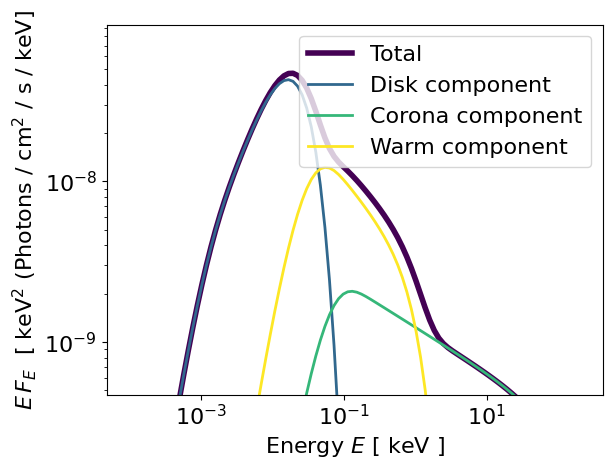

In [19]:
#M=1e3 ## BH mass
mdot=0.5 ## BH accretion rate in Edd units
astar=0. ## BH dimensionless spin absolute value.
hard_xray_fraction=0.02
corona_electron_energy=100
warm_electron_energy=0.2
warm_photon_index=2.5
reflection_albedo=0.3
distance = 16e+29
#distance = 1
#my_sed=sed.SED(M=M,mdot=mdot,astar=astar,hard_xray_fraction=hard_xray_fraction,corona_electron_energy=corona_electron_energy,warm_electron_energy=warm_electron_energy,reflection_albedo=reflection_albedo,reprocessing=True)
#print(1.24*1e-3/my_sed.energy_range)
#my_sed.plot_total_flux(distance)
#print(my_sed.total_flux(distance))
#plt.figure(1)
M = [1e8]
for i in range(len(M)):
    my_sed=sed.SED(M=M[i],mdot=mdot,astar=astar,hard_xray_fraction=hard_xray_fraction,corona_electron_energy=corona_electron_energy,warm_electron_energy=warm_electron_energy,reflection_albedo=reflection_albedo,reprocessing=True)
    #print(my_sed.energy_range_erg)
    #plt.plot(my_sed.energy_range, my_sed.total_flux(distance))
    my_sed.plot_total_flux(distance)
    #print(my_sed.total_flux(distance))
    #print(1.24e-3*my_sed.energy_range)

#my_sed.total_flux(distance)
energy = np.array(my_sed.energy_range)
#wavelength = 1.24*1e-3/energy
#print(my_sed.total_flux(10e10))
flux = np.array(my_sed.total_flux(distance))
flux = 6.63e-27*flux
luminosity = flux*(4*np.pi*(distance*distance))
luminosity = luminosity*(energy*(2.42e+17))
print(luminosity)
#flux = flux/(1e-23)
#flux = flux/1e-6
#print(flux)
#flux = (1.29e-10)*flux*(energy*energy)
#print(flux)
#luminosity = flux*(4*np.pi*(distance*distance))/(3.826e+33)
#print(luminosity)
#print(y)
#x = 1
#print(x)
#plt.figure(2)
#plt.loglog(wavelength,luminosity)
#plt.ylim[1e-9,1e9]
plt.savefig('trial.pdf')